# 分类树

In [1]:
import sklearn as sk
from sklearn.datasets import load_wine #红酒数据集
from sklearn.model_selection import train_test_split

In [6]:
wine = load_wine()

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [28]:
#random_state保证随机性不会显现，否则随机选取几个特征构成集合
#低维度随机性不显现
dt = sk.tree.DecisionTreeClassifier(criterion="entropy", random_state=30
                                   ,splitter='random')
dt = dt.fit(Xtrain, Ytrain)
score = dt.score(Xtest, Ytest)

In [31]:
score

0.9814814814814815

In [11]:
import graphviz

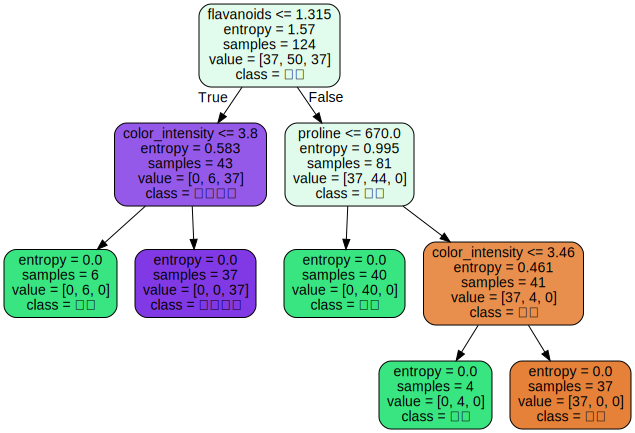

In [15]:
class_name = ['琴酒', '雪莉', '贝尔摩德']
dot_data = tree.export_graphviz(dt, feature_names=wine.feature_names,
                               class_names=class_name, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [17]:
#用到的特征及其重要性
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45725729, 0.        , 0.        , 0.22596798,
       0.        , 0.        , 0.31677473])

In [19]:
#构成元组
[*zip(wine.feature_names, dt.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.45725729021558936),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.22596798101557558),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.31677472876883517)]

In [32]:
dt.score(Xtrain, Ytrain)

1.0

In [55]:
clf = sk.tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=0
                                    ,splitter="random"
                                    ,max_depth=3
                                    ,min_samples_leaf=5
                                    ,min_samples_split=10
                                    #,class_weight={0:1, 1:1.5, 2:2}
                                    )
clf = clf.fit(Xtrain, Ytrain)

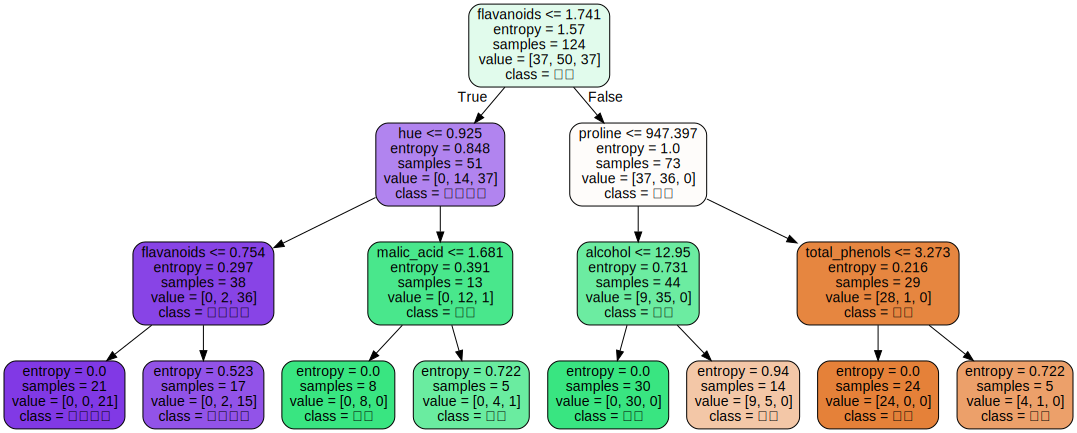

In [61]:
dot_data2 = tree.export_graphviz(clf
                                , feature_names=wine.feature_names
                                , class_names = class_name
                                , filled = True
                                , rounded = True)
graph2 = graphviz.Source(dot_data2)
graph2

In [63]:
#得到tree中test例子的叶子节点
clf.apply(Xtest)
#clf.predict(Xtest)

array([10, 10,  4,  3, 13, 13, 13, 10,  4,  4, 10,  3, 10, 13, 11,  7,  3,
        7,  4,  6, 13, 10, 13, 13,  7,  4, 14,  4, 10, 13, 13, 10,  6,  3,
       13,  6, 13, 11, 10, 13, 11, 11, 10, 13, 13, 13, 10, 13, 10,  3,  6,
       13,  3,  6], dtype=int64)

In [56]:
clf.score(Xtrain, Ytrain)

0.9274193548387096

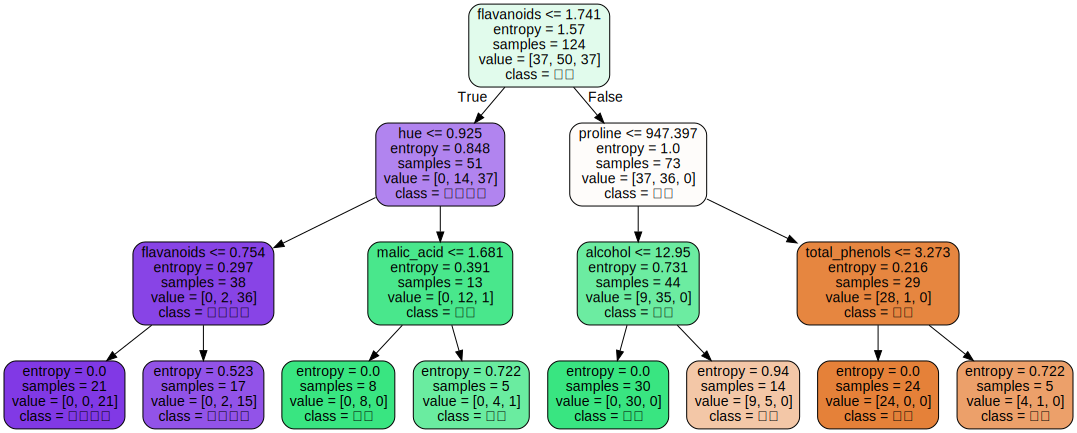

In [43]:
dot_data1 = tree.export_graphviz(clf
                                , feature_names=wine.feature_names
                                , class_names=class_name
                                ,filled=True
                                ,rounded=True)
graph1 = graphviz.Source(dot_data1)
graph1

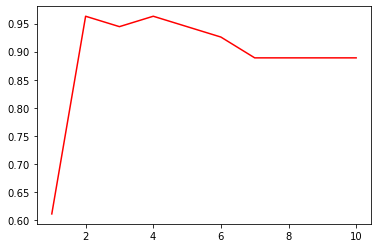

In [45]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf1 = tree.DecisionTreeClassifier(criterion="entropy"
                                        , max_depth= i+1
                                        , random_state=0
                                        , splitter='random')
    clf1.fit(Xtrain, Ytrain)
    score = clf1.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1, 11), test, color='red', label='max_depth')
#plt.legend()
plt.show()

# 回归树

In [64]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [68]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=5
               ,scoring="neg_mean_squared_error")#默认打分机制为R²

array([-12.15176471, -52.12217822, -27.85663366, -52.6449505 ,
       -63.19168317])

# 分类树例子及画图

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [9]:
X, Y = make_classification(n_samples=100
                          ,n_features=2
                          ,n_redundant=0
                          ,n_informative=2
                          ,random_state=1
                          ,n_clusters_per_class=1)

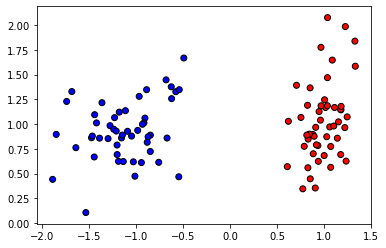

In [10]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors='k')
plt.show()

In [12]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, Y)
datasets = [make_moons(noise=0.3, random_state=0)
           ,make_circles(noise=0.3, factor=0.5, random_state=0)
           , linearly_separable]

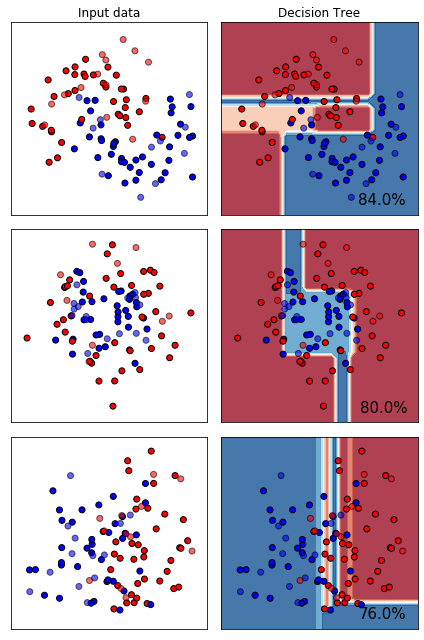

In [34]:
figure = plt.figure(figsize=(6, 9))
i = 1
for ds_index, ds in enumerate(datasets):
    #对于input data进行散点图的绘制
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() +.5
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2)
                                , np.arange(x2_min, x2_max, 0.2))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_index == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright
              , edgecolors='k'
              )
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright
              , alpha = .6 
              , edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    ax = plt.subplot(len(datasets), 2, i)
    
    #建立决策树
    clf = DecisionTreeClassifier(max_depth=5)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #生成的z包含了索引以及各个样本对应类的概率
    z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:, 1]
    z = z.reshape(array1.shape)
    #画出决策树的边界
    ax.contourf(array1, array2, z, cmap=cm, alpha=.8)
    
    #将数据集画上,分成训练集和测试集
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train
              , cmap=cm_bright
              , edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test
              , cmap=cm_bright
              , edgecolors='k'
              , alpha=.6)
    #设置坐标轴的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    if ds_index == 0:
        ax.set_title("Decision Tree")
    
    #在右下角写下分数
    ax.text(array1.max()-.3, array2.min()+.3
           ,('{:.1f}%'.format(score*100)),
           size=15
           ,horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

In [19]:
np.c_[[1, 2, 3], [4, 5, 6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

# 回归树拟合及画图

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
#生成随机数作为训练数据
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[ : : 5] +=  3 * ( .5 - rng.rand(16))

In [5]:
reg1 = DecisionTreeRegressor(max_depth=2)
reg2 = DecisionTreeRegressor(max_depth=5)
reg1.fit(X, y)
reg2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

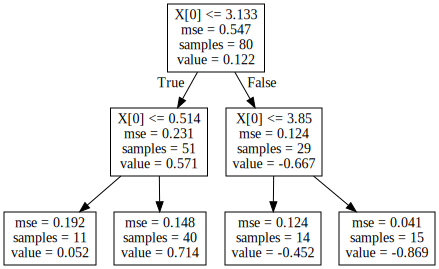

In [12]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(reg1)
graph = graphviz.Source(dot_data)
graph

In [10]:
X_test = np.arange(0.0, 5.0, .01 )[:, np.newaxis]
y_1 = reg1.predict(X_test)
y_2 = reg2.predict(X_test)

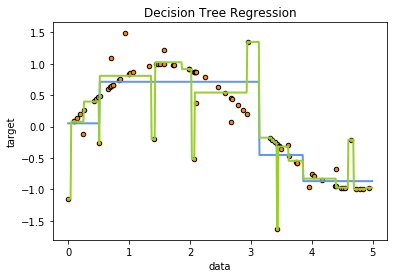

In [11]:
plt.figure()
plt.scatter(X, y, s=20, edgecolors="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2"
        , linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5",
        linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()